In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier


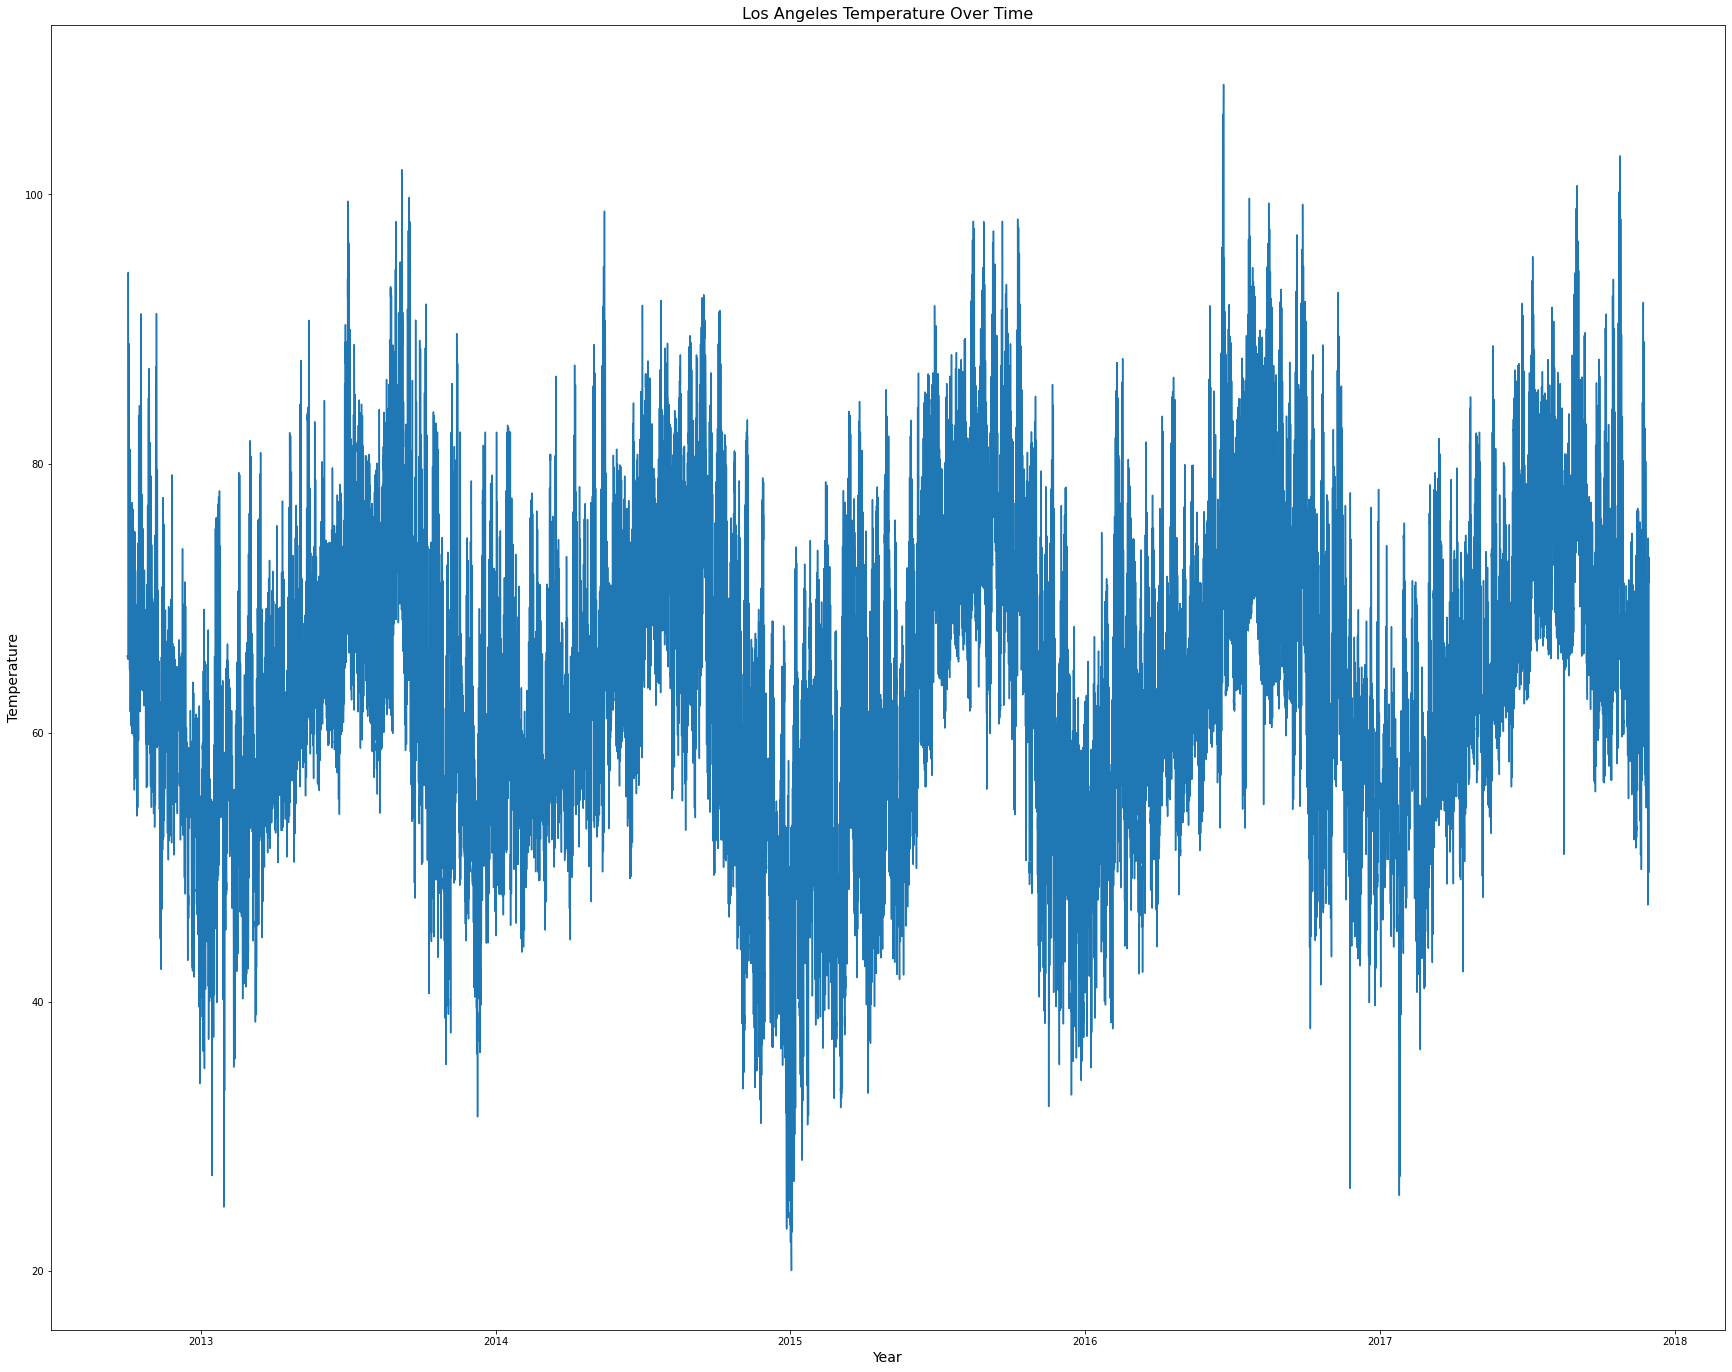

In [138]:
df = pd.read_csv('LosAngelesTempData.csv')

def convertKtoF(x):
    x = (x-273.15) * (9/5) +32
    return float(x)

df ['datetime'] = pd.to_datetime(df ['datetime'])
df ['temperature'] = df['temperature'].apply(convertKtoF)


plt.figure(figsize=(30,24))
plt.plot(df['datetime'], df['temperature'])
plt.title('Los Angeles Temperature Over Time', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('Temperature', size=14)
plt.show()

df['Month'] = df['datetime'].dt.month
df['Year'] = df['datetime'].dt.year
df['Day'] = df['datetime'].dt.day
df['Hour'] = df['datetime'].dt.hour



In [149]:
print(df.head())

targetVar = df['temperature']
features = df[['humidity', 'pressure', 'windspeed','Month', 'Year']]

print(df.dtypes)

X_train, X_val, Y_train, Y_val = train_test_split(features, targetVar, test_size=0.2, random_state=40)

from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Y_train)

# view transformed values
# print(y_transformed)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5,n_estimators=5,random_state=1)
model.fit(X_train,y_transformed)
y_pred = model.predict(X_val)


             datetime  temperature  humidity  pressure  windspeed  Month  \
0 2012-10-01 13:00:00    65.696000        88      1013          0     10   
1 2012-10-01 14:00:00    65.692734        88      1013          0     10   
2 2012-10-01 15:00:00    65.683120        88      1013          0     10   
3 2012-10-01 16:00:00    65.673506        88      1013          0     10   
4 2012-10-01 17:00:00    65.663892        88      1013          0     10   

   Year  Day  Hour  
0  2012    1    13  
1  2012    1    14  
2  2012    1    15  
3  2012    1    16  
4  2012    1    17  
datetime       datetime64[ns]
temperature           float64
humidity                int64
pressure                int64
windspeed               int64
Month                   int64
Year                    int64
Day                     int64
Hour                    int64
dtype: object


MemoryError: Unable to allocate 834. MiB for an array with shape (8983, 12175) and data type float64